<a href="https://colab.research.google.com/github/fralfaro/r4ds-book/blob/main/docs/12_tidy_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tidy data

## Introduction

> "Happy families are all alike; every unhappy family is unhappy in its
> own way." --– Leo Tolstoy

> "Tidy datasets are all alike, but every messy dataset is messy in its
> own way." --– Hadley Wickham

In this chapter, you will learn a consistent way to organise your data in R, an organisation called __tidy data__. Getting your data into this format requires some upfront work, but that work pays off in the long term. Once you have tidy data and the tidy tools provided by packages in the tidyverse, you will spend much less time munging data from one representation to another, allowing you to spend more time on the analytic questions at hand.

This chapter will give you a practical introduction to tidy data and the accompanying tools in the __tidyr__ package. If you'd like to learn more about the underlying theory, you might enjoy the *Tidy Data* paper published in the Journal of Statistical Software, <http://www.jstatsoft.org/v59/i10/paper>.

### Prerequisites

In this chapter we'll focus on tidyr, a package that provides a bunch of tools to help tidy up your messy datasets. tidyr is a member of the core tidyverse.



In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()




## Tidy data

You can represent the same underlying data in multiple ways. The example below shows the same data organised in four different ways. Each dataset shows the same values of four variables *country*, *year*, *population*, and *cases*, but each dataset organises the values in a different way.



In [2]:
table1

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [3]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [4]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [5]:
# Spread across two tibbles
table4a  # cases


,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766


In [6]:
table4b  # population

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,19987071,20595360
2,Brazil,172006362,174504898
3,China,1272915272,1280428583



These are all representations of the same underlying data, but they are not equally easy to use. One dataset, the tidy dataset, will be much easier to work with inside the tidyverse. 

There are three interrelated rules which make a dataset tidy:

1.  Each variable must have its own column.
1.  Each observation must have its own row.
1.  Each value must have its own cell.

The following figure shows the rules visually.



<center>
    <img src="https://d33wubrfki0l68.cloudfront.net/6f1ddb544fc5c69a2478e444ab8112fb0eea23f8/91adc/images/tidy-1.png" alt="img R" >
     Following three rules makes a dataset tidy: variables are in columns, observations are in rows, and values are in cells.
</center>



These three rules are interrelated because it's impossible to only satisfy two of the three. That interrelationship leads to an even simpler set of practical instructions:

1.  Put each dataset in a tibble.
1.  Put each variable in a column.

In this example, only `table1` is tidy. It's the only representation where each column is a variable.

Why ensure that your data is tidy? There are two main advantages:

1.  There's a general advantage to picking one consistent way of storing
    data. If you have a consistent data structure, it's easier to learn the
    tools that work with it because they have an underlying uniformity.
    
1.  There's a specific advantage to placing variables in columns because
    it allows R's vectorised nature to shine. As you learned in
    [mutate](#mutate-funs) and [summary functions](#summary-funs), most 
    built-in R functions work with vectors of values. That makes transforming 
    tidy data feel particularly natural.

dplyr, ggplot2, and all the other packages in the tidyverse are designed to work with tidy data. Here are a couple of small examples showing how you might work with `table1`.



In [8]:
# Compute rate per 10,000
table1 %>% 
  mutate(rate = cases / population * 10000)

country,year,cases,population,rate
<chr>,<int>,<int>,<int>,<dbl>
Afghanistan,1999,745,19987071,0.372741
Afghanistan,2000,2666,20595360,1.294466
Brazil,1999,37737,172006362,2.193930
Brazil,2000,80488,174504898,4.612363
China,1999,212258,1272915272,1.667495
China,2000,213766,1280428583,1.669488


In [9]:
# Compute cases per year
table1 %>% 
  count(year, wt = cases)

year,n
<int>,<int>
1999,250740
2000,296920


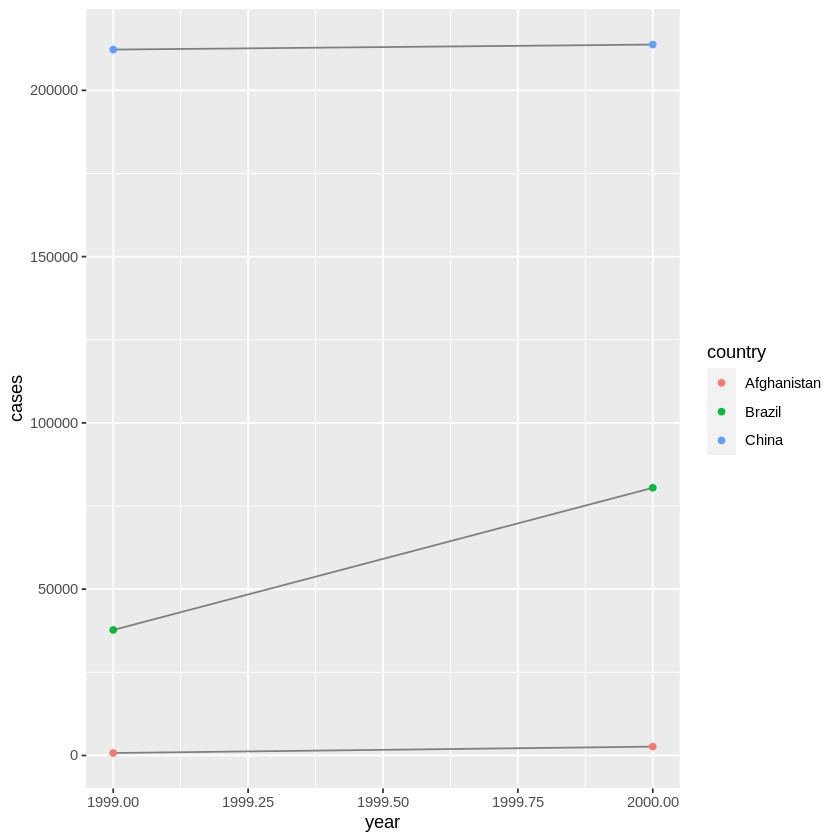

In [10]:
# Visualise changes over time
library(ggplot2)
ggplot(table1, aes(year, cases)) + 
  geom_line(aes(group = country), colour = "grey50") + 
  geom_point(aes(colour = country))


### Exercises

1.  Using prose, describe how the variables and observations are organised in
    each of the sample tables.

1.  Compute the `rate` for `table2`, and `table4a` + `table4b`. 
    You will need to perform four operations:

    1.  Extract the number of TB cases per country per year.
    1.  Extract the matching population per country per year.
    1.  Divide cases by population, and multiply by 10000.
    1.  Store back in the appropriate place.
    
    Which representation is easiest to work with? Which is hardest? Why?

1.  Recreate the plot showing change in cases over time using `table2`
    instead of `table1`. What do you need to do first?

## Pivoting

The principles of tidy data seem so obvious that you might wonder if you'll ever encounter a dataset that isn't tidy. Unfortunately, however, most data that you will encounter will be untidy. There are two main reasons:

1.  Most people aren't familiar with the principles of tidy data, and it's hard
    to derive them yourself unless you spend a _lot_ of time working with data.
    
1.  Data is often organised to facilitate some use other than analysis. For 
    example, data is often organised to make entry as easy as possible.
    
This means for most real analyses, you'll need to do some tidying. The first step is always to figure out what the variables and observations are. Sometimes this is easy; other times you'll need to consult with the people who originally generated the data. 
The second step is to resolve one of two common problems:

1. One variable might be spread across multiple columns.

1. One observation might be scattered across multiple rows.

Typically a dataset will only suffer from one of these problems; it'll only suffer from both if you're really unlucky! To fix these problems, you'll need the two most important functions in tidyr: `pivot_longer()` and `pivot_wider()`.

### Longer

A common problem is a dataset where some of the column names are not names of variables, but _values_ of a variable. Take `table4a`: the column names `1999` and `2000` represent values of the `year` variable, the values in the `1999` and `2000` columns represent values of the `cases` variable, and each row represents two observations, not one.



In [11]:
table4a

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766



To tidy a dataset like this, we need to __pivot__ the offending columns into a new pair of variables. To describe that operation we need three parameters:

* The set of columns whose names are values, not variables. In this example, 
  those are the columns `1999` and `2000`.

* The name of the variable to move the column names to. Here it is `year`.

* The name of the variable to move the column values to. Here it's `cases`.
  
Together those parameters generate the call to `pivot_longer()`:



In [12]:
table4a %>% 
  pivot_longer(c(`1999`, `2000`), names_to = "year", values_to = "cases")

country,year,cases
<chr>,<chr>,<int>
Afghanistan,1999,745
Afghanistan,2000,2666
Brazil,1999,37737
Brazil,2000,80488
China,1999,212258
China,2000,213766



The columns to pivot are specified with `dplyr::select()` style notation. Here there are only two columns, so we list them individually. Note that "1999" and "2000" are non-syntactic names (because they don't start with a letter) so we have to surround them in backticks. To refresh your memory of the other ways to select columns, see [select](#select).

`year` and `cases` do not exist in `table4a` so we put their names in quotes.




<center>
    <img src="https://d33wubrfki0l68.cloudfront.net/3aea19108d39606bbe49981acda07696c0c7fcd8/2de65/images/tidy-9.png" alt="img R" >
    Pivoting table4 into a longer, tidy form.
</center>



In the final result, the pivoted columns are dropped, and we get new `year` and `cases` columns. Otherwise, the relationships between the original variables are preserved. 

`pivot_longer()` makes datasets longer by increasing the number of rows and decreasing the number of columns. I don’t believe it makes sense to describe a dataset as being in “long form”. Length is a relative term, and you can only say (e.g.) that dataset A is longer than dataset B.

We can use `pivot_longer()` to tidy `table4b` in a similar fashion. The only difference is the variable stored in the cell values:


In [13]:
table4b %>% 
  pivot_longer(c(`1999`, `2000`), names_to = "year", values_to = "population")

country,year,population
<chr>,<chr>,<int>
Afghanistan,1999,19987071
Afghanistan,2000,20595360
Brazil,1999,172006362
Brazil,2000,174504898
China,1999,1272915272
China,2000,1280428583



To combine the tidied versions of `table4a` and `table4b` into a single tibble, we need to use `dplyr::left_join()`, which you'll learn about in [relational data].


In [14]:
tidy4a <- table4a %>% 
  pivot_longer(c(`1999`, `2000`), names_to = "year", values_to = "cases")
tidy4b <- table4b %>% 
  pivot_longer(c(`1999`, `2000`), names_to = "year", values_to = "population")
left_join(tidy4a, tidy4b)

Joining, by = c("country", "year")


country,year,cases,population
<chr>,<chr>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583



### Wider

`pivot_wider()` is the opposite of `pivot_longer()`. You use it when an observation is scattered across multiple rows. For example, take `table2`: an observation is a country in a year, but each observation is spread across two rows.


In [15]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258



To tidy this up, we first analyse the representation in similar way to `pivot_longer()`. This time, however, we only need two parameters:

* The column to take variable names from. Here, it's `type`.

* The column to take values from. Here it's `count`.

Once we've figured that out, we can use `pivot_wider()`, as shown programmatically below, and visually in next figure.



In [16]:
table2 %>%
    pivot_wider(names_from = type, values_from = count)

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


<center>
    <img src="https://d33wubrfki0l68.cloudfront.net/8350f0dda414629b9d6c354f87acf5c5f722be43/bcb84/images/tidy-8.png" alt="img R" >
    Pivoting table2 into a “wider”, tidy form.
</center>



As you might have guessed from their names, `pivot_wider()` and `pivot_longer()` are complements. `pivot_longer()` makes wide tables narrower and longer; `pivot_wider()` makes long tables shorter and wider.

### Exercises

1.  Why are `pivot_longer()` and `pivot_wider()` not perfectly symmetrical?  
    Carefully consider the following example:


    ```r
    stocks <- tibble(
      year   = c(2015, 2015, 2016, 2016),
      half  = c(   1,    2,     1,    2),
      return = c(1.88, 0.59, 0.92, 0.17)
    )
    stocks %>% 
      pivot_wider(names_from = year, values_from = return) %>% 
      pivot_longer(`2015`:`2016`, names_to = "year", values_to = "return")
    ```

  (Hint: look at the variable types and think about column _names_.)
    
   `pivot_longer()` has a `names_ptypes` argument, e.g. 
   `names_ptypes = list(year = double())`. What does it do?





2.  Why does this code fail?

    ```r
    table4a %>% 
       pivot_longer(c(1999, 2000), names_to = "year", values_to = "cases")
    #> Error: Can't subset columns that don't exist.
    #> ✖ Locations 1999 and 2000 don't exist.
    #> ℹ There are only 3 columns.
    ```


3.  What would happen if you widen this table? Why? How could you add a 
    new column to uniquely identify each value?


    ```r
    people <- tribble(
      ~name,             ~names,  ~values,
      #-----------------|--------|------
      "Phillip Woods",   "age",       45,
      "Phillip Woods",   "height",   186,
      "Phillip Woods",   "age",       50,
      "Jessica Cordero", "age",       37,
      "Jessica Cordero", "height",   156
    )
    ```



4.  Tidy the simple tibble below. Do you need to make it wider or longer?
    What are the variables?


    ```r
    preg <- tribble(
      ~pregnant, ~male, ~female,
      "yes",     NA,    10,
      "no",      20,    12
    )
    ```



## Separating and uniting

So far you've learned how to tidy `table2` and `table4`, but not `table3`. `table3` has a different problem: we have one column (`rate`) that contains two variables (`cases` and `population`). To fix this problem, we'll need the `separate()` function. You'll also learn about the complement of `separate()`: `unite()`, which you use if a single variable is spread across multiple columns.

### Separate

`separate()` pulls apart one column into multiple columns, by splitting wherever a separator character appears. Take `table3`:



In [17]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583



The `rate` column contains both `cases` and `population` variables, and we need to split it into two variables. `separate()` takes the name of the column to separate, and the names of the columns to separate into, as shown in next figure and the code below.



In [18]:
table3 %>% 
  separate(rate, into = c("cases", "population"))

country,year,cases,population
<chr>,<int>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583



```{r}
table3 %>% 
  separate(rate, into = c("cases", "population"))
```



<center>
    <img src="https://d33wubrfki0l68.cloudfront.net/f6fca537e77896868fedcd85d9d01031930d76c9/637d9/images/tidy-17.png" alt="img R" >
Separating table3 makes it tidy
</center>




By default, `separate()` will split values wherever it sees a non-alphanumeric character (i.e. a character that isn't a number or letter). For example, in the code above, `separate()` split the values of `rate` at the forward slash characters. If you wish to use a specific character to separate a column, you can pass the character to the `sep` argument of `separate()`. For example, we could rewrite the code above as:


In [19]:
table3 %>% 
  separate(rate, into = c("cases", "population"), sep = "/")

country,year,cases,population
<chr>,<int>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583



(Formally, `sep` is a regular expression, which you'll learn more about in [strings].)

Look carefully at the column types: you'll notice that `cases` and `population` are character columns. This is the default behaviour in `separate()`: it leaves the type of the column as is. Here, however, it's not very useful as those really are numbers. We can ask `separate()` to try and convert to better types using `convert = TRUE`:


In [20]:
table3 %>% 
  separate(rate, into = c("cases", "population"), convert = TRUE)

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583



You can also pass a vector of integers to `sep`. `separate()` will interpret the integers as positions to split at. Positive values start at 1 on the far-left of the strings; negative value start at -1 on the far-right of the strings. When using integers to separate strings, the length of `sep` should be one less than the number of names in `into`. 

You can use this arrangement to separate the last two digits of each year. This make this data less tidy, but is useful in other cases, as you'll see in a little bit.


In [21]:
table3 %>% 
  separate(year, into = c("century", "year"), sep = 2)

country,century,year,rate
<chr>,<chr>,<chr>,<chr>
Afghanistan,19,99,745/19987071
Afghanistan,20,00,2666/20595360
Brazil,19,99,37737/172006362
Brazil,20,00,80488/174504898
China,19,99,212258/1272915272
China,20,00,213766/1280428583



### Unite

`unite()` is the inverse of `separate()`: it combines multiple columns into a single column. You'll need it much less frequently than `separate()`, but it's still a useful tool to have in your back pocket.




<center>
    <img src="https://d33wubrfki0l68.cloudfront.net/3d98d3ba019fed3f9ee328284568d4508e479ef8/0b3e6/images/tidy-18.png" alt="img R">
     Uniting table5 makes it tidy
</center>


We can use `unite()` to rejoin the *century* and *year* columns that we created in the last example. That data is saved as `tidyr::table5`. `unite()` takes a data frame, the name of the new variable to create, and a set of columns to combine, again specified in `dplyr::select()` style:



In [22]:
table5 %>% 
  unite(new, century, year)

country,new,rate
<chr>,<chr>,<chr>
Afghanistan,19_99,745/19987071
Afghanistan,20_00,2666/20595360
Brazil,19_99,37737/172006362
Brazil,20_00,80488/174504898
China,19_99,212258/1272915272
China,20_00,213766/1280428583



In this case we also need to use the `sep` argument. The default will place an underscore (`_`) between the values from different columns. Here we don't want any separator so we use `""`:


In [23]:
table5 %>% 
  unite(new, century, year, sep = "")

country,new,rate
<chr>,<chr>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583



### Exercises

1.  What do the `extra` and `fill` arguments do in `separate()`? 
    Experiment with the various options for the following two toy datasets.
    
    
    ```r
    tibble(x = c("a,b,c", "d,e,f,g", "h,i,j")) %>% 
      separate(x, c("one", "two", "three"))
    
    tibble(x = c("a,b,c", "d,e", "f,g,i")) %>% 
      separate(x, c("one", "two", "three"))
    ```


2.  Both `unite()` and `separate()` have a `remove` argument. What does it
    do? Why would you set it to `FALSE`?

3.  Compare and contrast `separate()` and `extract()`.  Why are there
    three variations of separation (by position, by separator, and with
    groups), but only one unite?

## Missing values

Changing the representation of a dataset brings up an important subtlety of missing values. Surprisingly, a value can be missing in one of two possible ways:

* __Explicitly__, i.e. flagged with `NA`.
* __Implicitly__, i.e. simply not present in the data.

Let's illustrate this idea with a very simple data set:


In [25]:
stocks <- tibble(
  year   = c(2015, 2015, 2015, 2015, 2016, 2016, 2016),
  qtr    = c(   1,    2,    3,    4,    2,    3,    4),
  return = c(1.88, 0.59, 0.35,   NA, 0.92, 0.17, 2.66)
)


There are two missing values in this dataset:

* The return for the fourth quarter of 2015 is explicitly missing, because
  the cell where its value should be instead contains `NA`.
  
* The return for the first quarter of 2016 is implicitly missing, because it
  simply does not appear in the dataset.
  
One way to think about the difference is with this Zen-like koan: An explicit missing value is the presence of an absence; an implicit missing value is the absence of a presence.

The way that a dataset is represented can make implicit values explicit. For example, we can make the implicit missing value explicit by putting years in the columns:


In [26]:
stocks %>% 
  pivot_wider(names_from = year, values_from = return)

qtr,2015,2016
<dbl>,<dbl>,<dbl>
1,1.88,NA
2,0.59,0.92
3,0.35,0.17
4,NA,2.66



Because these explicit missing values may not be important in other representations of the data, you can set `values_drop_na = TRUE` in `pivot_longer()` to turn explicit missing values implicit:


In [27]:
stocks %>% 
  pivot_wider(names_from = year, values_from = return) %>% 
  pivot_longer(
    cols = c(`2015`, `2016`), 
    names_to = "year", 
    values_to = "return", 
    values_drop_na = TRUE
  )

qtr,year,return
<dbl>,<chr>,<dbl>
1,2015,1.88
2,2015,0.59
2,2016,0.92
3,2015,0.35
3,2016,0.17
4,2016,2.66



Another important tool for making missing values explicit in tidy data is `complete()`:


In [28]:
stocks %>% 
  complete(year, qtr)

year,qtr,return
<dbl>,<dbl>,<dbl>
2015,1,1.88
2015,2,0.59
2015,3,0.35
2015,4,NA
2016,1,NA
2016,2,0.92
2016,3,0.17
2016,4,2.66



`complete()` takes a set of columns, and finds all unique combinations. It then ensures the original dataset contains all those values, filling in explicit `NA`s where necessary.

There's one other important tool that you should know for working with missing values. Sometimes when a data source has primarily been used for data entry, missing values indicate that the previous value should be carried forward:


In [29]:
treatment <- tribble(
  ~ person,           ~ treatment, ~response,
  "Derrick Whitmore", 1,           7,
  NA,                 2,           10,
  NA,                 3,           9,
  "Katherine Burke",  1,           4
)


You can fill in these missing values with `fill()`. It takes a set of columns where you want missing values to be replaced by the most recent non-missing value (sometimes called last observation carried forward).



In [30]:
treatment %>% 
  fill(person)

person,treatment,response
<chr>,<dbl>,<dbl>
Derrick Whitmore,1,7
Derrick Whitmore,2,10
Derrick Whitmore,3,9
Katherine Burke,1,4



### Exercises

1.  Compare and contrast the `fill` arguments to `pivot_wider()` and `complete()`. 

1.  What does the direction argument to `fill()` do?

## Case Study

To finish off the chapter, let's pull together everything you've learned to tackle a realistic data tidying problem. The `tidyr::who` dataset contains tuberculosis (TB) cases broken down by year, country, age, gender, and diagnosis method. The data comes from the *2014 World Health Organization Global Tuberculosis Report*, available at <http://www.who.int/tb/country/data/download/en/>.

There's a wealth of epidemiological information in this dataset, but it's challenging to work with the data in the form that it's provided:



In [31]:
who

country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,⋯,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Afghanistan,AF,AFG,1980,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1981,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1982,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1983,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1984,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1985,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1986,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1987,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1988,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA



This is a very typical real-life example dataset. It contains redundant columns, odd variable codes, and many missing values. In short, `who` is messy, and we'll need multiple steps to tidy it. Like dplyr, tidyr is designed so that each function does one thing well. That means in real-life situations you'll usually need to string together multiple verbs into a pipeline. 

The best place to start is almost always to gather together the columns that are not variables. Let's have a look at what we've got: 

* It looks like `country`, `iso2`, and `iso3` are three variables that 
  redundantly specify the country.
  
* `year` is clearly also a variable.

* We don't know what all the other columns are yet, but given the structure 
  in the variable names (e.g. `new_sp_m014`, `new_ep_m014`, `new_ep_f014`) 
  these are likely to be values, not variables.

So we need to gather together all the columns from `new_sp_m014` to `newrel_f65`. We don't know what those values represent yet, so we'll give them the generic name `"key"`. We know the cells represent the count of cases, so we'll use the variable `cases`. There are a lot of missing values in the current representation, so for now we'll use `values_drop_na` just so we can focus on the values that are present.


In [32]:
who1 <- who %>% 
  pivot_longer(
    cols = new_sp_m014:newrel_f65, 
    names_to = "key", 
    values_to = "cases", 
    values_drop_na = TRUE
  )
who1

country,iso2,iso3,year,key,cases
<chr>,<chr>,<chr>,<int>,<chr>,<int>
Afghanistan,AF,AFG,1997,new_sp_m014,0
Afghanistan,AF,AFG,1997,new_sp_m1524,10
Afghanistan,AF,AFG,1997,new_sp_m2534,6
Afghanistan,AF,AFG,1997,new_sp_m3544,3
Afghanistan,AF,AFG,1997,new_sp_m4554,5
Afghanistan,AF,AFG,1997,new_sp_m5564,2
Afghanistan,AF,AFG,1997,new_sp_m65,0
Afghanistan,AF,AFG,1997,new_sp_f014,5
Afghanistan,AF,AFG,1997,new_sp_f1524,38



We can get some hint of the structure of the values in the new `key` column by counting them:


In [33]:
who1 %>% 
  count(key)

key,n
<chr>,<int>
new_ep_f014,1032
new_ep_f1524,1021
new_ep_f2534,1021
new_ep_f3544,1021
new_ep_f4554,1017
new_ep_f5564,1017
new_ep_f65,1014
new_ep_m014,1038
new_ep_m1524,1026



You might be able to parse this out by yourself with a little thought and some experimentation, but luckily we have the data dictionary handy. It tells us:

1.  The first three letters of each column denote whether the column 
    contains new or old cases of TB. In this dataset, each column contains 
    new cases.

1.  The next two letters describe the type of TB:
    
    *   `rel` stands for cases of relapse
    *   `ep` stands for cases of extrapulmonary TB
    *   `sn` stands for cases of pulmonary TB that could not be diagnosed by 
        a pulmonary smear (smear negative)
    *   `sp` stands for cases of pulmonary TB that could be diagnosed by 
        a pulmonary smear (smear positive)

3.  The sixth letter gives the sex of TB patients. The dataset groups 
    cases by males (`m`) and females (`f`).

4.  The remaining numbers gives the age group. The dataset groups cases into 
    seven age groups:
    
    * `014` = 0 -- 14 years old
    * `1524` = 15 -- 24 years old
    * `2534` = 25 -- 34 years old
    * `3544` = 35 -- 44 years old
    * `4554` = 45 -- 54 years old
    * `5564` = 55 -- 64 years old
    * `65` = 65 or older

We need to make a minor fix to the format of the column names: unfortunately the names are slightly inconsistent because instead of `new_rel` we have `newrel` (it's hard to spot this here but if you don't fix it we'll get errors in subsequent steps). You'll learn about `str_replace()` in [strings], but the basic idea is pretty simple: replace the characters "newrel" with "new_rel". This makes all variable names consistent.


In [34]:
who2 <- who1 %>% 
  mutate(key = stringr::str_replace(key, "newrel", "new_rel"))
who2

country,iso2,iso3,year,key,cases
<chr>,<chr>,<chr>,<int>,<chr>,<int>
Afghanistan,AF,AFG,1997,new_sp_m014,0
Afghanistan,AF,AFG,1997,new_sp_m1524,10
Afghanistan,AF,AFG,1997,new_sp_m2534,6
Afghanistan,AF,AFG,1997,new_sp_m3544,3
Afghanistan,AF,AFG,1997,new_sp_m4554,5
Afghanistan,AF,AFG,1997,new_sp_m5564,2
Afghanistan,AF,AFG,1997,new_sp_m65,0
Afghanistan,AF,AFG,1997,new_sp_f014,5
Afghanistan,AF,AFG,1997,new_sp_f1524,38



We can separate the values in each code with two passes of `separate()`. The first pass will split the codes at each underscore.



In [35]:
who3 <- who2 %>% 
  separate(key, c("new", "type", "sexage"), sep = "_")
who3

country,iso2,iso3,year,new,type,sexage,cases
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
Afghanistan,AF,AFG,1997,new,sp,m014,0
Afghanistan,AF,AFG,1997,new,sp,m1524,10
Afghanistan,AF,AFG,1997,new,sp,m2534,6
Afghanistan,AF,AFG,1997,new,sp,m3544,3
Afghanistan,AF,AFG,1997,new,sp,m4554,5
Afghanistan,AF,AFG,1997,new,sp,m5564,2
Afghanistan,AF,AFG,1997,new,sp,m65,0
Afghanistan,AF,AFG,1997,new,sp,f014,5
Afghanistan,AF,AFG,1997,new,sp,f1524,38



Then we might as well drop the `new` column because it's constant in this dataset. While we're dropping columns, let's also drop `iso2` and `iso3` since they're redundant.


In [36]:
who3 %>% 
  count(new)
who4 <- who3 %>% 
  select(-new, -iso2, -iso3)

new,n
<chr>,<int>
new,76046



Next we'll separate `sexage` into `sex` and `age` by splitting after the first character:


In [37]:
who5 <- who4 %>% 
  separate(sexage, c("sex", "age"), sep = 1)
who5

country,year,type,sex,age,cases
<chr>,<int>,<chr>,<chr>,<chr>,<int>
Afghanistan,1997,sp,m,014,0
Afghanistan,1997,sp,m,1524,10
Afghanistan,1997,sp,m,2534,6
Afghanistan,1997,sp,m,3544,3
Afghanistan,1997,sp,m,4554,5
Afghanistan,1997,sp,m,5564,2
Afghanistan,1997,sp,m,65,0
Afghanistan,1997,sp,f,014,5
Afghanistan,1997,sp,f,1524,38



The `who` dataset is now tidy!

I've shown you the code a piece at a time, assigning each interim result to a new variable. This typically isn't how you'd work interactively. Instead, you'd gradually build up a complex pipe:


In [38]:
who %>%
  pivot_longer(
    cols = new_sp_m014:newrel_f65, 
    names_to = "key", 
    values_to = "cases", 
    values_drop_na = TRUE
  ) %>% 
  mutate(
    key = stringr::str_replace(key, "newrel", "new_rel")
  ) %>%
  separate(key, c("new", "var", "sexage")) %>% 
  select(-new, -iso2, -iso3) %>% 
  separate(sexage, c("sex", "age"), sep = 1)

country,year,var,sex,age,cases
<chr>,<int>,<chr>,<chr>,<chr>,<int>
Afghanistan,1997,sp,m,014,0
Afghanistan,1997,sp,m,1524,10
Afghanistan,1997,sp,m,2534,6
Afghanistan,1997,sp,m,3544,3
Afghanistan,1997,sp,m,4554,5
Afghanistan,1997,sp,m,5564,2
Afghanistan,1997,sp,m,65,0
Afghanistan,1997,sp,f,014,5
Afghanistan,1997,sp,f,1524,38



### Exercises

1.  In this case study I set `values_drop_na = TRUE` just to make it easier to
    check that we had the correct values. Is this reasonable? Think about
    how missing values are represented in this dataset. Are there implicit
    missing values? What's the difference between an `NA` and zero? 

1.  What happens if you neglect the `mutate()` step?
    (`mutate(names_from = stringr::str_replace(key, "newrel", "new_rel"))`)

1.  I claimed that `iso2` and `iso3` were redundant with `country`. 
    Confirm this claim.

1.  For each country, year, and sex compute the total number of cases of 
    TB. Make an informative visualisation of the data.

## Non-tidy data

Before we continue on to other topics, it's worth talking briefly about non-tidy data. Earlier in the chapter, I used the pejorative term "messy" to refer to non-tidy data. That's an oversimplification: there are lots of useful and well-founded data structures that are not tidy data. There are two main reasons to use other data structures:

* Alternative representations may have substantial performance or space 
  advantages.
  
* Specialised fields have evolved their own conventions for storing data
  that may be quite different to the conventions of  tidy data.

Either of these reasons means you'll need something other than a tibble (or data frame). If your data does fit naturally into a rectangular structure composed of observations and variables, I think tidy data should be your default choice. But there are good reasons to use other structures; tidy data is not the only way.

If you'd like to learn more about non-tidy data, I'd highly recommend this thoughtful blog post by Jeff Leek: <http://simplystatistics.org/2016/02/17/non-tidy-data/>
